## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## View Full Dataset

In [2]:
data_url = "./Data/card_transdata.csv"

data = pd.read_csv(data_url)

print(data.shape)

data.head()

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Load Train and Test Data

In [3]:
train_url = "./Data/Train/train_data.csv"
test_url = "./Data/Test/test_data.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

train_X = train_data.drop(columns="fraud")
train_Y = train_data["fraud"]

test_X = test_data.drop(columns="fraud")
test_Y = test_data["fraud"]

In [4]:
print(f"Training Data Shapes: {train_X.shape}, {train_Y.shape}")
print(f"Testing Data Shapes: {test_X.shape}, {test_Y.shape}")

print(f"Training Data Fraud Value Counts:\n{train_Y.value_counts()}")
print(f"Testing Data Fraud Value Counts:\n{test_Y.value_counts()}")

Training Data Shapes: (800000, 7), (800000,)
Testing Data Shapes: (200000, 7), (200000,)
Training Data Fraud Value Counts:
0.0    730181
1.0     69819
Name: fraud, dtype: int64
Testing Data Fraud Value Counts:
0.0    182416
1.0     17584
Name: fraud, dtype: int64


In [5]:
train_X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0


In [6]:
train_Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

## KNN

### Default - 5 Neighbors

In [7]:
ccdata_knn = KNeighborsClassifier(weights="uniform")
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier()

In [8]:
# Train accuracy
predict_Y_train = ccdata_knn.predict(train_X)
acc_knn_train = accuracy_score(train_Y, predict_Y_train)
print('Train Accuracy:', acc_knn_train)

Train Accuracy: 0.99093625


In [11]:
predict_Y_knn = ccdata_knn.predict(test_X)
# Test accuracy
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print('Test Accuracy:', acc_knn)

Test Accuracy: 0.98386


In [12]:
cmat = confusion_matrix(test_Y, predict_Y_knn)

In [13]:
f1_score(test_Y, predict_Y_knn)

0.9099481113652849

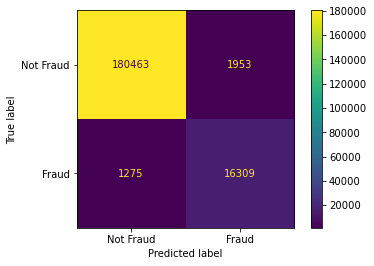

In [14]:
confusion_matrix5 = cmat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix5, display_labels=["Not Fraud", "Fraud"])
disp.plot()

### 1 Neighbor

In [15]:
ccdata_knn = KNeighborsClassifier(weights="uniform", n_neighbors=1)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Train accuracy
predict_Y_train = ccdata_knn.predict(train_X)
acc_knn_train = accuracy_score(train_Y, predict_Y_train)
print('Train Accuracy:', acc_knn_train)

Train Accuracy: 1.0


In [17]:
predict_Y_knn = ccdata_knn.predict(test_X)
# Test accuracy
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print('Test Accuracy:', acc_knn)

Test Accuracy: 0.986235


In [18]:
cmat = confusion_matrix(test_Y, predict_Y_knn)

In [19]:
f1_score(test_Y, predict_Y_knn)

0.9228829939213984

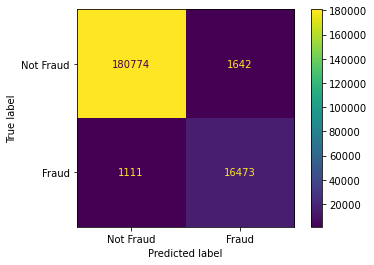

In [20]:
confusion_matrix1 = cmat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=["Not Fraud", "Fraud"])
disp.plot()

### 2 Neighbors

In [21]:
ccdata_knn = KNeighborsClassifier(weights="uniform", n_neighbors=2)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=2)

In [22]:
# Train accuracy
predict_Y_train = ccdata_knn.predict(train_X)
acc_knn_train = accuracy_score(train_Y, predict_Y_train)
print('Train Accuracy:', acc_knn_train)

Train Accuracy: 0.9946925


In [23]:
predict_Y_knn = ccdata_knn.predict(test_X)
# Test accuracy
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print('Test Accuracy:', acc_knn)

Test Accuracy: 0.985105


In [24]:
cmat = confusion_matrix(test_Y, predict_Y_knn)

In [25]:
f1_score(test_Y, predict_Y_knn)

0.9119550761046253

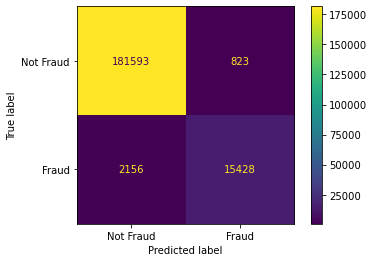

In [26]:
confusion_matrix2 = cmat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2, display_labels=["Not Fraud", "Fraud"])
disp.plot()

### 3 Neighbors

In [27]:
ccdata_knn = KNeighborsClassifier(weights="uniform", n_neighbors=3)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Train accuracy
predict_Y_train = ccdata_knn.predict(train_X)
acc_knn_train = accuracy_score(train_Y, predict_Y_train)
print('Train Accuracy:', acc_knn_train)

Train Accuracy: 0.9935625


In [30]:
predict_Y_knn = ccdata_knn.predict(test_X)
# Test accuracy
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print('Test Accuracy:', acc_knn)

Test Accuracy: 0.98465


In [31]:
cmat = confusion_matrix(test_Y, predict_Y_knn)

In [32]:
f1_score(test_Y, predict_Y_knn)

0.9142553904591666

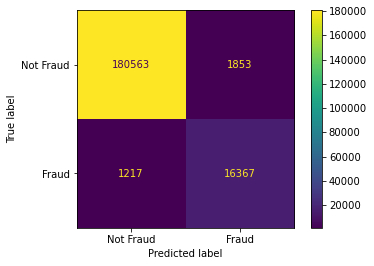

In [33]:
confusion_matrix3 = cmat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix3, display_labels=["Not Fraud", "Fraud"])
disp.plot()

### 10 Neighbors

In [34]:
ccdata_knn = KNeighborsClassifier(weights="uniform", n_neighbors=10)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=10)

In [35]:
# Train accuracy
predict_Y_train = ccdata_knn.predict(train_X)
acc_knn_train = accuracy_score(train_Y, predict_Y_train)
print('Train Accuracy:', acc_knn_train)

Train Accuracy: 0.987505


In [36]:
predict_Y_knn = ccdata_knn.predict(test_X)
# Test accuracy
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print('Test Accuracy:', acc_knn)

Test Accuracy: 0.982375


In [37]:
cmat = confusion_matrix(test_Y, predict_Y_knn)

In [38]:
f1_score(test_Y, predict_Y_knn)

0.8989131369906226

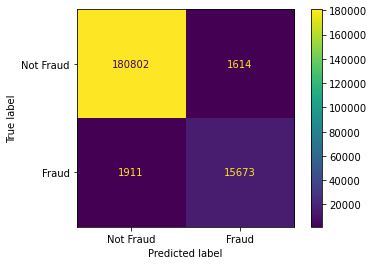

In [39]:
confusion_matrix10 = cmat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix10, display_labels=["Not Fraud", "Fraud"])
disp.plot()

### 50 Neighbors

In [40]:
ccdata_knn = KNeighborsClassifier(weights="uniform", n_neighbors=50)
ccdata_knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=50)

In [41]:
# Train accuracy
predict_Y_train = ccdata_knn.predict(train_X)
acc_knn_train = accuracy_score(train_Y, predict_Y_train)
print('Train Accuracy:', acc_knn_train)

Train Accuracy: 0.976065


In [42]:
predict_Y_knn = ccdata_knn.predict(test_X)
# Test accuracy
acc_knn = accuracy_score(test_Y, predict_Y_knn)
print('Test Accuracy:', acc_knn)

Test Accuracy: 0.97445


In [43]:
cmat = confusion_matrix(test_Y, predict_Y_knn)

In [44]:
f1_score(test_Y, predict_Y_knn)

0.8517809490660169

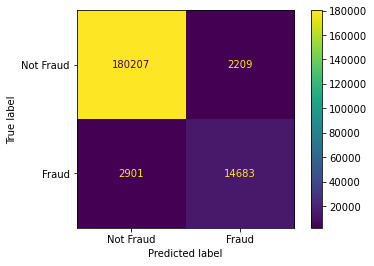

In [45]:
confusion_matrix50 = cmat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix50, display_labels=["Not Fraud", "Fraud"])
disp.plot()

## Plot of KNN using 2 Features

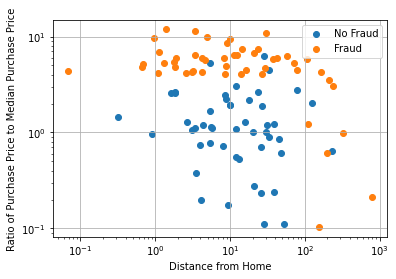

In [46]:
# Separate datapoints between which did and did not experience fraud
had_fraud = train_data[train_data['fraud'] == 1.0]
no_fraud = train_data[train_data['fraud'] == 0.0]

# Select only the first fraction of points for plotting
had_fraud_subset = had_fraud.iloc[0:49]
no_fraud_subset = no_fraud.iloc[0:49]

# Make scatterplot showing separate cases as functions of distance_from_home and ratio_to_median_purchase_price
plt.scatter(no_fraud_subset['distance_from_home'], no_fraud_subset['ratio_to_median_purchase_price'], label='No Fraud')
plt.scatter(had_fraud_subset['distance_from_home'], had_fraud_subset['ratio_to_median_purchase_price'], label='Fraud')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio of Purchase Price to Median Purchase Price')
plt.legend()
plt.grid()

In [47]:
# Generate point grid to perform KNN on
dist_from_home_range = np.logspace(-1, 3, num=20)
ratio_to_median_range = np.logspace(-1, 1, num=15)
grid_x, grid_y = np.meshgrid(dist_from_home_range, ratio_to_median_range)

# Convert point grid to dataframe
grid_x_flat = np.ravel(grid_x)
grid_y_flat = np.ravel(grid_y)

grid_flat = np.array([grid_x_flat, grid_y_flat])
grid_flat = np.transpose(grid_flat)
test_X_2col = pd.DataFrame(grid_flat, columns=['distance_from_home', 'ratio_to_median_purchase_price'])
test_X_2col.head()

,distance_from_home,ratio_to_median_purchase_price
0,0.100000,0.1
1,0.162378,0.1
2,0.263665,0.1
3,0.428133,0.1
4,0.695193,0.1


In [48]:
# Create model
train_X_2col = train_X[['distance_from_home', 'ratio_to_median_purchase_price']]
train_Y_2col = train_Y

n_neighbors = 1
clf_2col = KNeighborsClassifier(weights="uniform", n_neighbors=n_neighbors)
clf_2col.fit(train_X_2col, train_Y_2col)

predict_Y_knn_2col = clf_2col.predict(test_X_2col)

test_2col = pd.DataFrame()
test_2col['distance_from_home'] = test_X_2col['distance_from_home']
test_2col['ratio_to_median_purchase_price'] = test_X_2col['ratio_to_median_purchase_price']
test_2col['fraud'] = predict_Y_knn_2col

# Separate datapoints between which did and did not experience fraud
had_fraud_grid = test_2col[test_2col['fraud'] == 1.0]
no_fraud_grid = test_2col[test_2col['fraud'] == 0.0]

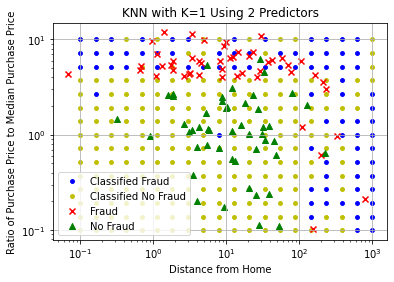

In [49]:
# Make scatterplot showing separate cases as functions of distance_from_home and ratio_to_median_purchase_price
plt.scatter(had_fraud_grid['distance_from_home'], had_fraud_grid['ratio_to_median_purchase_price'],
            s=15, c='b', label='Classified Fraud')
plt.scatter(no_fraud_grid['distance_from_home'], no_fraud_grid['ratio_to_median_purchase_price'],
            s=15, c='y', label='Classified No Fraud')
plt.scatter(had_fraud_subset['distance_from_home'], had_fraud_subset['ratio_to_median_purchase_price'],
            label='Fraud', c='r', marker='x')
plt.scatter(no_fraud_subset['distance_from_home'], no_fraud_subset['ratio_to_median_purchase_price'],
            label='No Fraud', c='g', marker='^')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio of Purchase Price to Median Purchase Price')
plt.title(f'KNN with K={n_neighbors} Using 2 Predictors')
plt.legend(loc='lower left')
plt.grid()